<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
library(tidyverse)
library(edgeR)
library(tximport)
library(GenomicFeatures)

── Attaching packages ────────────────────────────────── tidyverse 1.3.0.9000 ──

✔ ggplot2 3.3.2          ✔ purrr   0.3.4     
✔ tibble  3.0.2          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: limma

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are ma

In [3]:
ann  <-  '~/data/genome/gtf/Saccharomyces_cerevisiae.R64-1-1.46.gtf'
table_  <- data.table::fread('~/data/PRJNA475469/SraRunTable_PRJNA475469.txt')
samples <- table_ %>%
                dplyr::select(`Run`,`kinase_inhibitor`,
                       `media`, stress, Genotype)%>%
                #unite('condition', `Factor Value[genotype]`,`Factor Value[environmental stress]`)%>%
                distinct()#

In [4]:
files <- file.path('~/data/rnaseq/PRJNA475469/quants',(samples$Run),'quant.sf')
names(files) <- samples$Run

In [5]:
txdb <- makeTxDbFromEnsembl("Saccharomyces cerevisiae",
                                    server="useastdb.ensembl.org")
k <- keys(txdb, keytype = "TXNAME")
tx2gene <- AnnotationDbi::select(txdb, k, "GENEID", "TXNAME")
txi.salmon <- tximport(files,type='salmon',tx2gene=tx2gene)

ypd_wt <-  samples%>%filter(Genotype=='WT')%>%mutate(stress=ifelse(media=='SDC','SD',ifelse(stress=='None','YPD',stress)))
ypd_wt_runids <-ypd_wt%>%dplyr::select(Run)%>%pull()

Fetch transcripts and genes from Ensembl ... 
OK

Fetch exons and CDS from Ensembl ... 
OK

Fetch chromosome names and lengths from Ensembl ...
OK

Gather the metadata ... 
OK

Make the TxDb object ... 
OK

'select()' returned 1:1 mapping between keys and columns

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
137 
138 
139 
140 
141 
142 
143 
144 
145 
146 
147 
148 
149 
150 
151 
152 
153 
154 
155 
156 
157 
158 
159 
160 
161 
162 
1

In [6]:
counts_mat<- txi.salmon$counts[,ypd_wt_runids]
y <- DGEList(counts=counts_mat)
y <- calcNormFactors(y,method='TMM')
tmm <- cpm(y)

In [7]:
samples

Run,kinase_inhibitor,media,stress,Genotype
<chr>,<chr>,<chr>,<chr>,<chr>
SRR7287618,None,YPD,Azetidine,WT
SRR7287619,None,YPD,Azetidine,WT
SRR7287620,None,YPD,Azetidine,WT
SRR7287621,None,YPD,Azetidine,WT
SRR7287622,Cocktail,YPD,Azetidine,WT
SRR7287623,Cocktail,YPD,Azetidine,WT
SRR7287624,Cocktail,YPD,Azetidine,WT
SRR7287625,Cocktail,YPD,Azetidine,WT
SRR7287628,Cocktail,YPD,Fluconazole,WT


In [8]:
ypd_sdc_runids <- samples%>%filter(kinase_inhibitor=='None'&(stress=='None'|stress=='Glucose_Dropout')&media=='YPD'&Genotype=='WT')%>%dplyr::select(Run)%>%pull()
ypd_sdc_runids

[1] "SRR7287638" "SRR7287639" "SRR7287640" "SRR7287641" "SRR7287658"
[6] "SRR7287659" "SRR7287660" "SRR7287661"

In [9]:

counts_mat<- txi.salmon$counts[,ypd_sdc_runids]
y <- DGEList(counts=counts_mat)
y <- calcNormFactors(y,method='TMM')
tmm <- cpm(y)


condition <- factor(samples%>%dplyr::filter(Run%in%ypd_sdc_runids)%>%dplyr::select(stress)%>%pull())
condition<-relevel(condition,ref='None')
design <- model.matrix(~condition)
rownames(design) <- colnames(y)
y <- estimateDisp(y,design,robust=T)
y$common.dispersion




[1] 0.01842791

In [10]:
fit <- glmFit(y,design)
lrt_ds <- glmLRT(fit,coef=2)
FDR <- p.adjust(lrt_ds$table$PValue, method="BH")
tb <- lrt_ds$table
tb['FDR']  <- FDR

#tb[lst_of_genes,]

In [11]:
enm_df <- data.table::fread('../data/interim/0824_df_withlinkcom.csv')

In [12]:
strain_ids <- data.table::fread('../data/interim/strain_ids_with_experiment_count_all.csv')

In [13]:
enm_rnaseq = enm_df %>% 
inner_join(strain_ids,c('orf_name'='Allele Gene name'))%>%
inner_join(tb%>%rownames_to_column('orf_name'),c('Systematic gene name.y'='orf_name'))

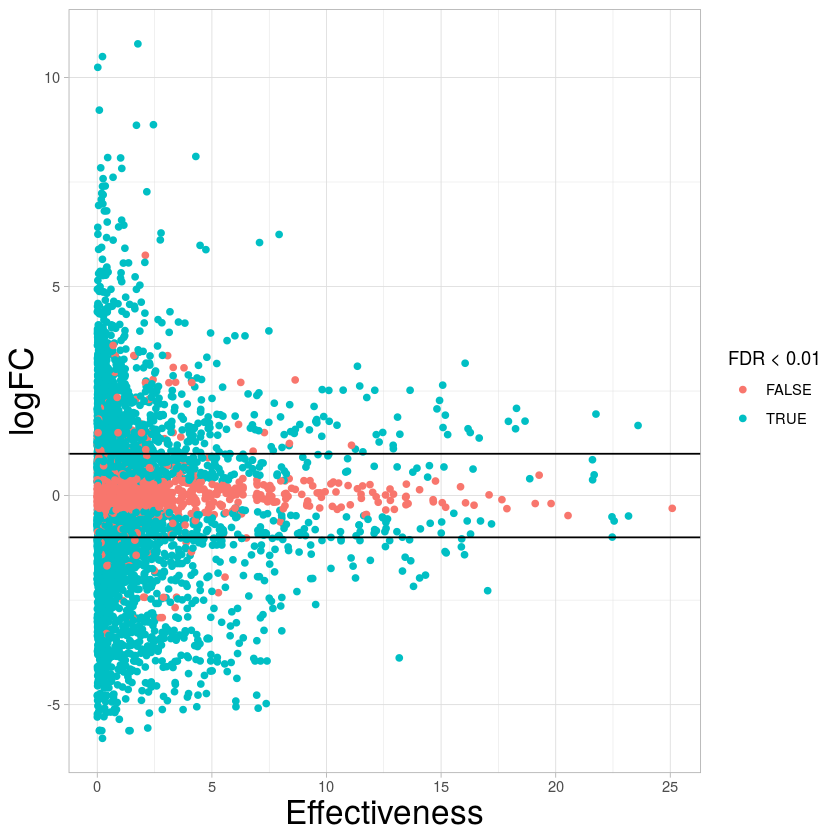

In [21]:
enm_rnaseq %>%ggplot(aes(x=eff,y=logFC,col=FDR < 0.01))+
    geom_point()+
    geom_hline(yintercept=1)+
    geom_hline(yintercept=-1)+theme_light()+xlab('Effectiveness')+
    theme(axis.title =element_text(size=20) )

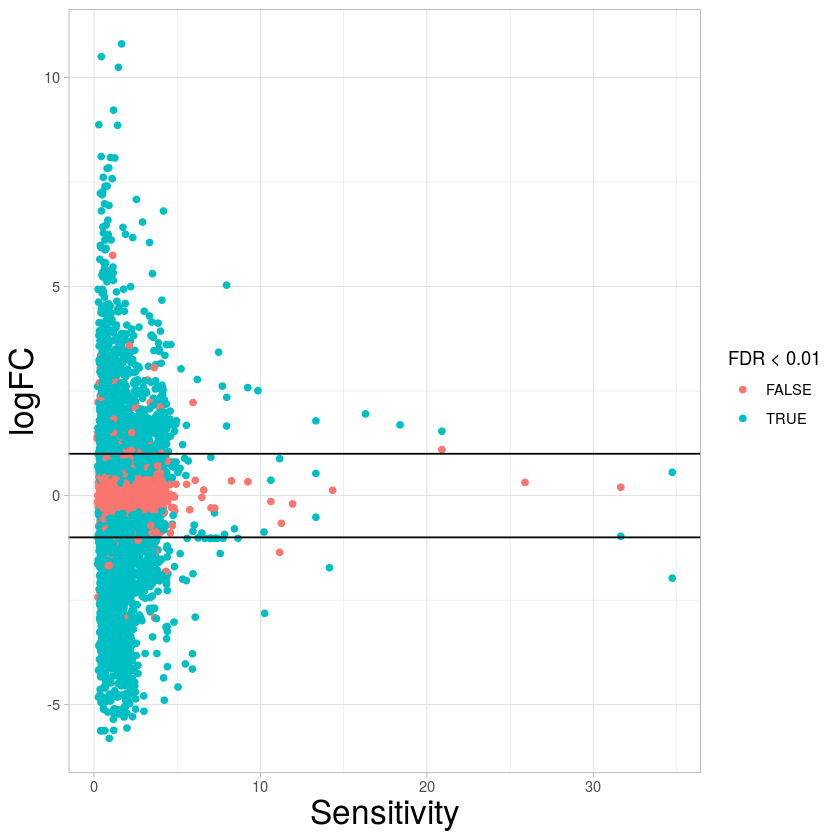

In [22]:
enm_rnaseq %>%ggplot(aes(x=sens,y=logFC,col=FDR < 0.01))+
    geom_point()+
    geom_hline(yintercept=1)+
    geom_hline(yintercept=-1)+theme_light()+xlab('Sensitivity')+
    theme(axis.title =element_text(size=20) )